<a href="https://colab.research.google.com/github/JoYongJIn/YongJin-Repository/blob/main/%08zero_shot_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
"Joshua K. Cage 저자 임선집 옮긴이의 101가지 문제로 배우는 딥러닝 허깅페이스 트랜스포머 with 파이토치(Python Transformers By Huggingface Hands On:)의 예제를 실행한 것임을 알립니다.
This code has been brought from the GitHub repository below and has been slightly modified.:

https://github.com/jasonyim2/book3/blob/main/Transformers%2027-36.ipynb "
'''

In [1]:
!pip install transformers ## 새주석: Hugging Face에서 제공하는 딥러닝모델 및 토크나이저 등을 쉽게 사용할수 있게 해주며 BERT, GPT-2, Transformer 등 많은 사전 학습된(pre-trained) 모델들이 포함되어 있습니다.
!pip install ftfy ## 새주석: Fixes Text For You의 약자로 텍스트 데이터를 정제하고 깨진 텍스트를 복원하는데 유용한 라이브러리 입니다.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 94.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 510.6 kB/s eta 0:00:00


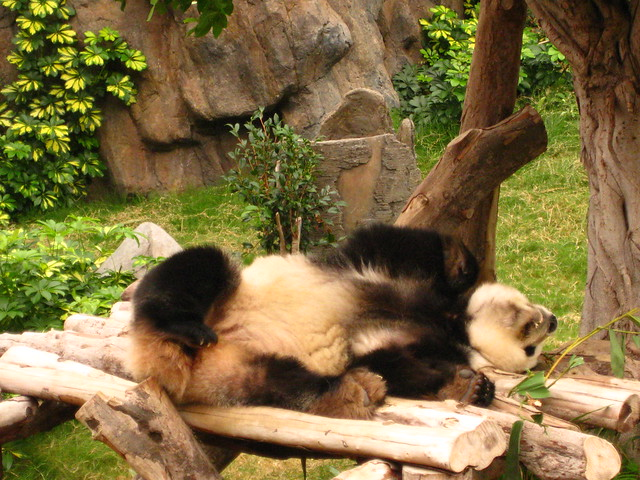

In [14]:
# Pillow 라이브러리(PIL)를 사용하여 이미지 불러오기
from PIL import Image
import requests

url = "http://farm8.staticflickr.com/7160/6648919291_08a8be3b03_z.jpg"
image = Image.open(requests.get(url, stream=True).raw)
image

In [16]:
# 모델 및 프로세서 불러오기
from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32") ## 새주석: CLIP은 이미지와 텍스트를 함께 처리하여 언어와 비전 태스크 모두에서 성능을 발휘할 수 있습니다. 때문에 zero_shot learning에 효과적입니다.
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32") ## 새주석: CLIP 모델에 데이터를 제공하기 전에 필요한 전처리 작업을 위해 불러옵니다.

In [17]:
model ## 새주석: 모델의 특징으로는 텍스트 정보와 이미지를 처리하는 Transformer구조이고 두 레이어 이미지와 텍스트의 특징을 동일한 임베딩 공간에 투영하기 위한 선형 변환입니다. CLIP에서는 이 두 특징 임베딩이 가까워지도록 학습됩니다.

CLIPModel(
  (text_model): CLIPTextTransformer(
    (embeddings): CLIPTextEmbeddings(
      (token_embedding): Embedding(49408, 512)
      (position_embedding): Embedding(77, 512)
    )
    (encoder): CLIPEncoder(
      (layers): ModuleList(
        (0-11): 12 x CLIPEncoderLayer(
          (self_attn): CLIPAttention(
            (k_proj): Linear(in_features=512, out_features=512, bias=True)
            (v_proj): Linear(in_features=512, out_features=512, bias=True)
            (q_proj): Linear(in_features=512, out_features=512, bias=True)
            (out_proj): Linear(in_features=512, out_features=512, bias=True)
          )
          (layer_norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (mlp): CLIPMLP(
            (activation_fn): QuickGELUActivation()
            (fc1): Linear(in_features=512, out_features=2048, bias=True)
            (fc2): Linear(in_features=2048, out_features=512, bias=True)
          )
          (layer_norm2): LayerNorm((512,), eps=1e-05,

In [19]:
# 텍스트를 리스트 타입으로 입력
candidates = ["three cats lying on the couch", "a photo of a cat", "a photo of a dog", "a lion", "a bear rolling on his back on some logs"]
## 새주석: 텍스트를 리스트 타입으로 입력하는데 옳은 텍스트 하나를 넣었습니다.

# 프로세서(ClIPPprocessor)에 텍스트 및 이미지를 입력하여 인코딩
inputs = processor(text=candidates, images=image, return_tensors="pt", padding=True)

# inputs 출력
inputs

{'input_ids': tensor([[49406,  2097,  3989,  7175,   525,   518, 12724, 49407, 49407, 49407,
         49407],
        [49406,   320,  1125,   539,   320,  2368, 49407, 49407, 49407, 49407,
         49407],
        [49406,   320,  1125,   539,   320,  1929, 49407, 49407, 49407, 49407,
         49407],
        [49406,   320,  5567, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407],
        [49406,   320,  4298,  6347,   525,   787,   893,   525,   836, 22745,
         49407]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
        [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]), 'pixel_values': tensor([[[[ 0.0179,  0.1639,  0.3537,  ..., -0.9164, -0.6536, -0.4784],
          [-0.1134, -0.1280, -0.1134,  ..., -0.9164, -0.7850, -0.5952],
          [-0.2156, -0.4930, -0.5514,  ..., -0.7558, -0.8726, -0.6390],
          ...,
          [-0.1572, -0

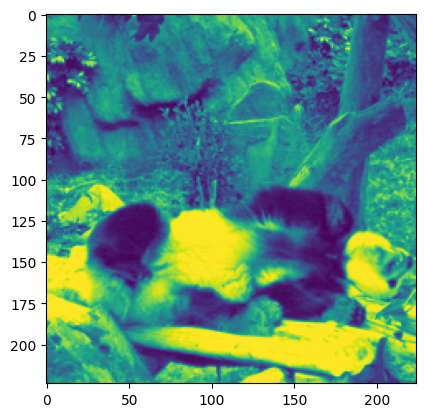

In [20]:
# 인코딩한 이미지 출력
import matplotlib.pyplot as plt ##새주석: 정규화로 인해 색이 변하였습니다.
plt.imshow(inputs['pixel_values'][0][0]); ##새주석: 딕셔너리에서 키에 관련된 값을 가져오고 첫 번째 요소에 대한 데이터를 가져옵니다.

In [21]:
# inputs['pixel_values'] 차원 확인
inputs['pixel_values'].shape ##새주석: (배치크기, 채널 수, 높이, 너비)로 구성되어있습니다.

torch.Size([1, 3, 224, 224])

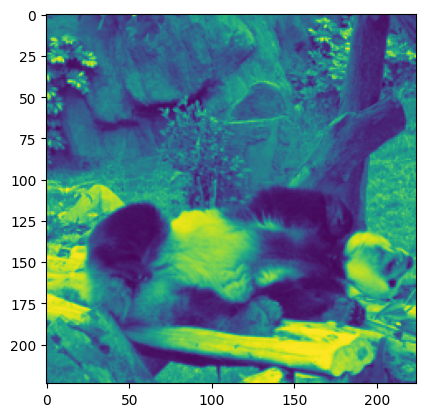

In [22]:
# 인코딩한 이미지 출력. 인덱스를 [0][1]로 변경
import matplotlib.pyplot as plt
plt.imshow(inputs['pixel_values'][0][1]); ##새주석: 인덱스를 배치에서 첫번째 이미지를 선택하고 첫번쨰 이미지의 채널중 두번째 채널을 선택하도록합니다.

In [24]:
# 인코딩된 텍스트 출력
inputs['input_ids'][0]

tensor([49406,  2097,  3989,  7175,   525,   518, 12724, 49407, 49407, 49407,
        49407])

In [25]:
# 위의 결과를 디코딩한 텍스트 출력
processor.tokenizer.decode(inputs['input_ids'][0])

'<|startoftext|>three cats lying on the couch <|endoftext|><|endoftext|><|endoftext|><|endoftext|>'

In [26]:
# 모델을 eval 모드로 전환
model.eval() ##새주석: 모델을 평가모드로 전환하는 합수입니다.

# **inputs에서의 ** 표시는 inputs 변수가 키(key)와 값(value)로 이루어져 있을 때
# input 변수에 담긴 키와 값을 모두 모델에 입력하는 용도임
outputs = model(**inputs)

# 출력물 outputs의 키(key) 출력
outputs.keys()

odict_keys(['logits_per_image', 'logits_per_text', 'text_embeds', 'image_embeds', 'text_model_output', 'vision_model_output'])

In [27]:
logits_per_image = outputs.logits_per_image
print(logits_per_image)

tensor([[22.9390, 25.2776, 25.4960, 23.9790, 29.2201]], grad_fn=<TBackward0>)


In [28]:
# logits_per_image에 담긴 값을 입력값 행별로(dim=1) 소프트맥스 함수에 투입
probs = logits_per_image.softmax(dim=1) ##새주석: softmax를 적용하는것으로 logits를 확률로 변환하는 함수로, 각 값이 [0,1]범위에 들어오며 전체 합이 1이 되도록 합니다.

import torch

# 변수 probs에 담긴 값 중에 최고값의 인덱스를 argmax로 찾고
# item()을 통해 레이블 즉 제목을 출력
# 그 결과가 cadidates의 인덱스 값이 됨
print(candidates[torch.argmax(probs).item()]) ##새주석: 텐서에서 가장 큰 값을 가진 요소의 인덱스를 변환합니다. 즉, 레이블의 인덱스를 얻게 됩니다.

a bear rolling on his back on some logs
